In [2]:
import os
import zipfile
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
# Step 1: Dataset Preparation
# Download and extract the Food-101 dataset
url = 'http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz'
dataset_path = tf.keras.utils.get_file('food-101.tar.gz', origin=url, extract=True)
base_dir = os.path.join(os.path.dirname(dataset_path), 'food-101', 'images')

4996278331/4996278331 ━━━━━━━━━━━━━━━━━━━━ 165s 0us/step


In [4]:
# Image Parameters
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

In [5]:
# Data Augmentation and Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% for validation
)

In [6]:
# Training and Validation Generators
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

Found 80800 images belonging to 101 classes.


In [7]:
val_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 20200 images belonging to 101 classes.


In [8]:
# Step 2: Model Development
base_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze base model

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [9]:
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.2),
    layers.Dense(101, activation='softmax')  # 101 classes in Food-101 dataset
])

In [10]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
# Step 3: Training
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2525/2525 ━━━━━━━━━━━━━━━━━━━━ 1095s 429ms/step - accuracy: 0.3183 - loss: 2.9303 - val_accuracy: 0.4767 - val_loss: 2.1325
Epoch 2/10
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 1076s 425ms/step - accuracy: 0.4713 - loss: 2.1409 - val_accuracy: 0.4980 - val_loss: 2.0589
Epoch 3/10
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 1072s 424ms/step - accuracy: 0.4858 - loss: 2.0915 - val_accuracy: 0.4980 - val_loss: 2.0578
Epoch 4/10
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 1070s 423ms/step - accuracy: 0.5009 - loss: 2.0316 - val_accuracy: 0.5042 - val_loss: 2.0217
Epoch 5/10
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 1067s 422ms/step - accuracy: 0.5002 - loss: 2.0302 - val_accuracy: 0.5002 - val_loss: 2.0531
Epoch 6/10
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 1071s 423ms/step - accuracy: 0.5006 - loss: 2.0260 - val_accuracy: 0.5009 - val_loss: 2.0604
Epoch 7/10
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 1065s 421ms/step - accuracy: 0.5031 - loss: 2.0132 - val_accuracy: 0.4982 - val_loss: 2.0888
Epoch 8/10
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 1072s 424ms/step - accur

In [11]:
# Save the model
model.save('food_classifier_model.h5')

In [12]:
import shutil
shutil.move('food_classifier_model.h5', '/kaggle/working/food_classifier_model.h5')


'/kaggle/working/food_classifier_model.h5'

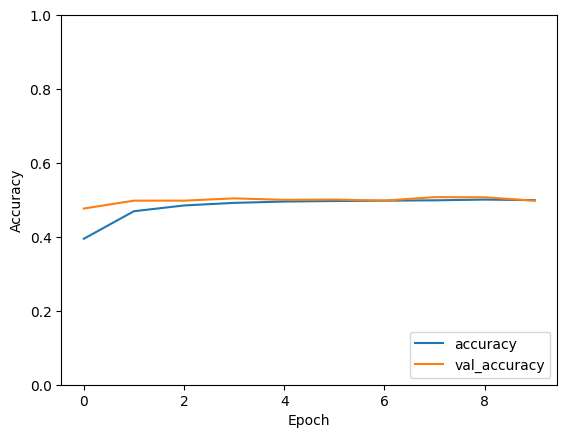

In [13]:
# Step 4: Visualization of Training Results
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [14]:
model.save('food_classifier_model2.h5', save_format='h5')


In [15]:
shutil.move('food_classifier_model2.h5', '/kaggle/working/food_classifier_model2.h5')


'/kaggle/working/food_classifier_model2.h5'

In [11]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,
    callbacks=[early_stopping]
)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2525/2525 ━━━━━━━━━━━━━━━━━━━━ 1093s 427ms/step - accuracy: 0.3187 - loss: 2.9393 - val_accuracy: 0.4824 - val_loss: 2.0978
Epoch 2/50
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 1059s 419ms/step - accuracy: 0.4687 - loss: 2.1637 - val_accuracy: 0.4934 - val_loss: 2.0661
Epoch 3/50
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 1066s 421ms/step - accuracy: 0.4894 - loss: 2.0718 - val_accuracy: 0.5059 - val_loss: 2.0238
Epoch 4/50
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 1063s 420ms/step - accuracy: 0.4957 - loss: 2.0439 - val_accuracy: 0.4998 - val_loss: 2.0385
Epoch 5/50
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 1060s 419ms/step - accuracy: 0.4953 - loss: 2.0481 - val_accuracy: 0.5098 - val_loss: 2.0445
Epoch 6/50
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 1059s 418ms/step - accuracy: 0.4990 - loss: 2.0333 - val_accuracy: 0.5017 - val_loss: 2.0533
Epoch 7/50
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 1057s 418ms/step - accuracy: 0.5064 - loss: 2.0107 - val_accuracy: 0.5036 - val_loss: 2.0606
Epoch 8/50
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 1053s 416ms/step - accur